In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_rows', 500)          ### to see the complete tables in console instead of "..." notation
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
import urllib.request
import seaborn as sns


### 1. Importing data from the source and printing dataframe.

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip'
filename = 'bank-additional.zip'
urllib.request.urlretrieve(url, filename)
from zipfile import ZipFile
zf = ZipFile("bank-additional.zip", "r")
zf.extract ("bank-additional/bank-additional-full.csv")
df = pd.read_csv("bank-additional\\bank-additional-full.csv", sep = ";")
display(df)
print(df.shape)
print(df.columns)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


(41188, 21)
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype='object')


### 2. Exploratory Data Analysis

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [4]:
### Seperating categorical and numerical features
numerical_features = [i for i in df.columns if (df[i].dtype) == "int64" or (df[i].dtype) == "float64"]
categorical_features = [i for i in df.columns if ((df[i].dtype) == "object") and i != "y"]
print(numerical_features)
print(categorical_features)


['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


In [5]:
### Info() method displays the absence of missing values in data. So, unique values analysis is done on categorical variables.
for i in categorical_features:
    print("The unique features in %s are: %s" % (i, (df[i].unique())))
for i in categorical_features:
    df[i].replace("unknown", np.NaN, inplace = True)


The unique features in job are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
The unique features in marital are: ['married' 'single' 'divorced' 'unknown']
The unique features in education are: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
The unique features in default are: ['no' 'unknown' 'yes']
The unique features in housing are: ['no' 'yes' 'unknown']
The unique features in loan are: ['no' 'yes' 'unknown']
The unique features in contact are: ['telephone' 'cellular']
The unique features in month are: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
The unique features in day_of_week are: ['mon' 'tue' 'wed' 'thu' 'fri']
The unique features in poutcome are: ['nonexistent' 'failure' 'success']


The "unknown" values of the features are replaced by np.NaN parameter to qualify them as the null values.

In [6]:
for i in df.columns:
    print("Missing values in %s is %s " %(i,round(((df[i].isnull().sum())/(len(df[i]))*100),2)))


Missing values in age is 0.0 
Missing values in job is 0.8 
Missing values in marital is 0.19 
Missing values in education is 4.2 
Missing values in default is 20.87 
Missing values in housing is 2.4 
Missing values in loan is 2.4 
Missing values in contact is 0.0 
Missing values in month is 0.0 
Missing values in day_of_week is 0.0 
Missing values in duration is 0.0 
Missing values in campaign is 0.0 
Missing values in pdays is 0.0 
Missing values in previous is 0.0 
Missing values in poutcome is 0.0 
Missing values in emp.var.rate is 0.0 
Missing values in cons.price.idx is 0.0 
Missing values in cons.conf.idx is 0.0 
Missing values in euribor3m is 0.0 
Missing values in nr.employed is 0.0 
Missing values in y is 0.0 


The percentage of missing values can be an issue for the "default" feature (which indicates whether the person has defaulted in the past or not). The decision to whether to retain/drop/treat this feature will be decided by further anlaysis.

In [7]:
print(df[categorical_features].describe().T)
print(df[numerical_features].describe().T)

             count unique                top   freq
job          40858     11             admin.  10422
marital      41108      3            married  24928
education    39457      7  university.degree  12168
default      32591      2                 no  32588
housing      40198      2                yes  21576
loan         40198      2                 no  33950
contact      41188      2           cellular  26144
month        41188     10                may  13769
day_of_week  41188      5                thu   8623
poutcome     41188      3        nonexistent  35563
                  count         mean         std       min       25%       50%       75%       max
age             41188.0    40.024060   10.421250    17.000    32.000    38.000    47.000    98.000
duration        41188.0   258.285010  259.279249     0.000   102.000   180.000   319.000  4918.000
campaign        41188.0     2.567593    2.770014     1.000     1.000     2.000     3.000    56.000
pdays           41188.0   962.47

Mean and Median value comparisons show that most of the variables are not highly skewed.

In [8]:
df["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

The data set is highly imbalanced as most of the respondants do not opt for term-deposit. This issue needs to be address while building the model

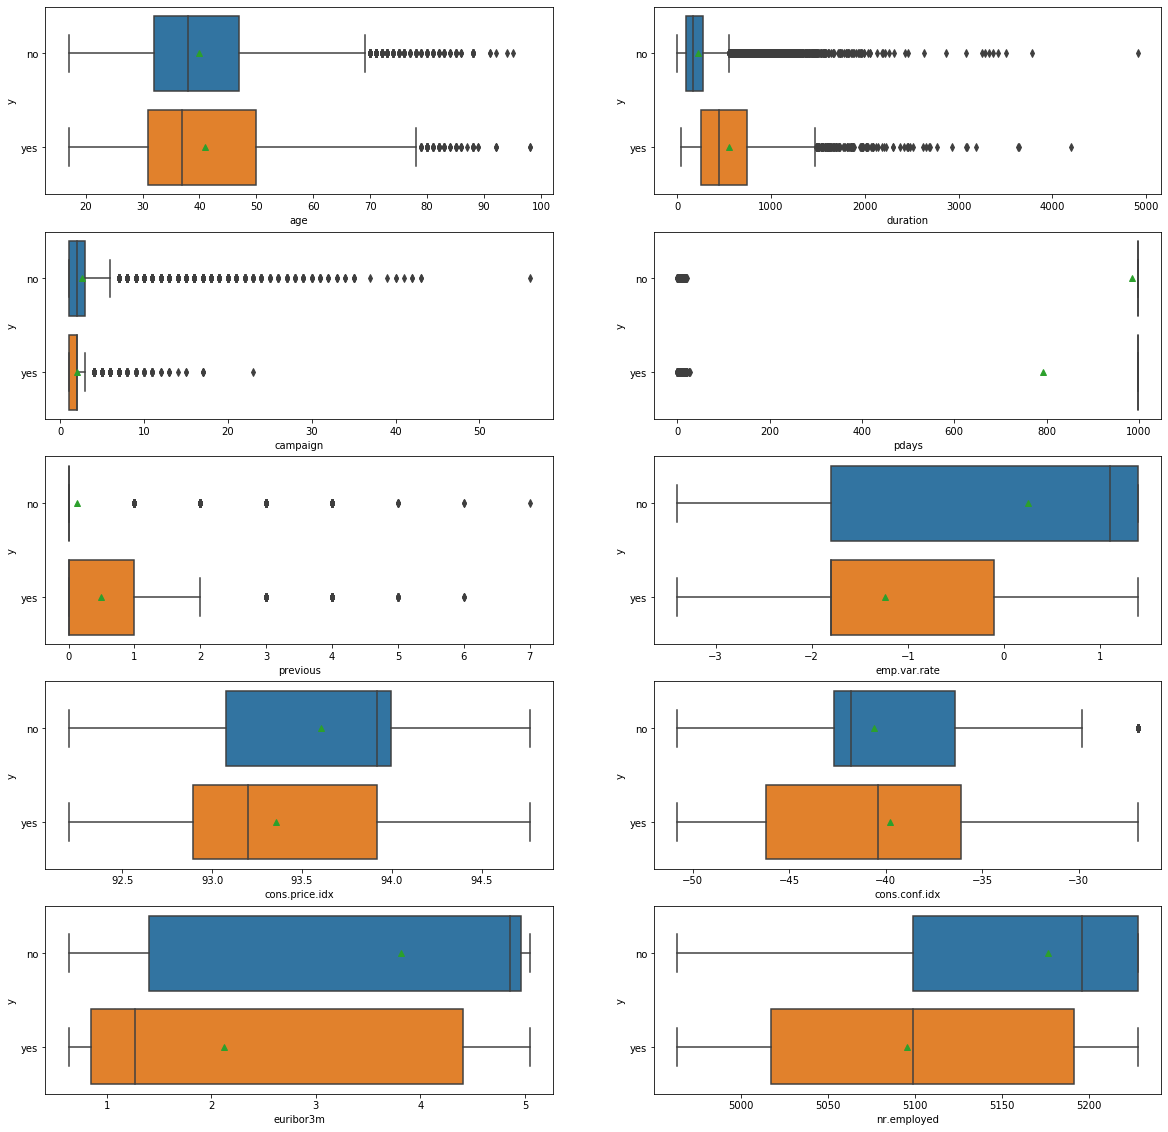

In [9]:
plt.figure(figsize=(20,20))
for i,col in enumerate(numerical_features,start=1):
    plt.subplot(5,2,i);
    sns.boxplot(x=df[col],y=df["y"], showmeans = True);
plt.show()

Some observations:

1. Age seems to be an imprtant indicator predict whether a person will subscribe to the loan or not. Thought the mean value of age for "Yes" and "No" values of "y" looks close, but the dispersion analysis shows the older people are more likely to opt for the term-loan.
2. Similar is the anlaysis for "duration". Higher duration means higher chances of y being a "yes".
3. Ambuigity arises for features like "campaign", "pdays" and "previous" because of the high shewness in the data.
4. "Emp.var.rate" seems to be related to "y" with a negative rate associate with higher chance to subscribe to term-loan. Similar is the analysis for nr.employed but in the opposite direction.
5. The relationship between "cons.price.inx" and "y" seems uncertain as there is a lot of overlap. simialr seems to be the case for "euribor3m".
6. "cons.conf.idx" is likely to have some power to predict "y" with lower values associated with the chances of person not subscribing to the term-loan.

Summary: 

-- Variables which seem to be important in predicting "y": Age, duration, Emp.var.rate, nr.employed, cons.conf.idx

-- Variables which do not seem to be important in predicting "y": cons.price.idx, euribor3m





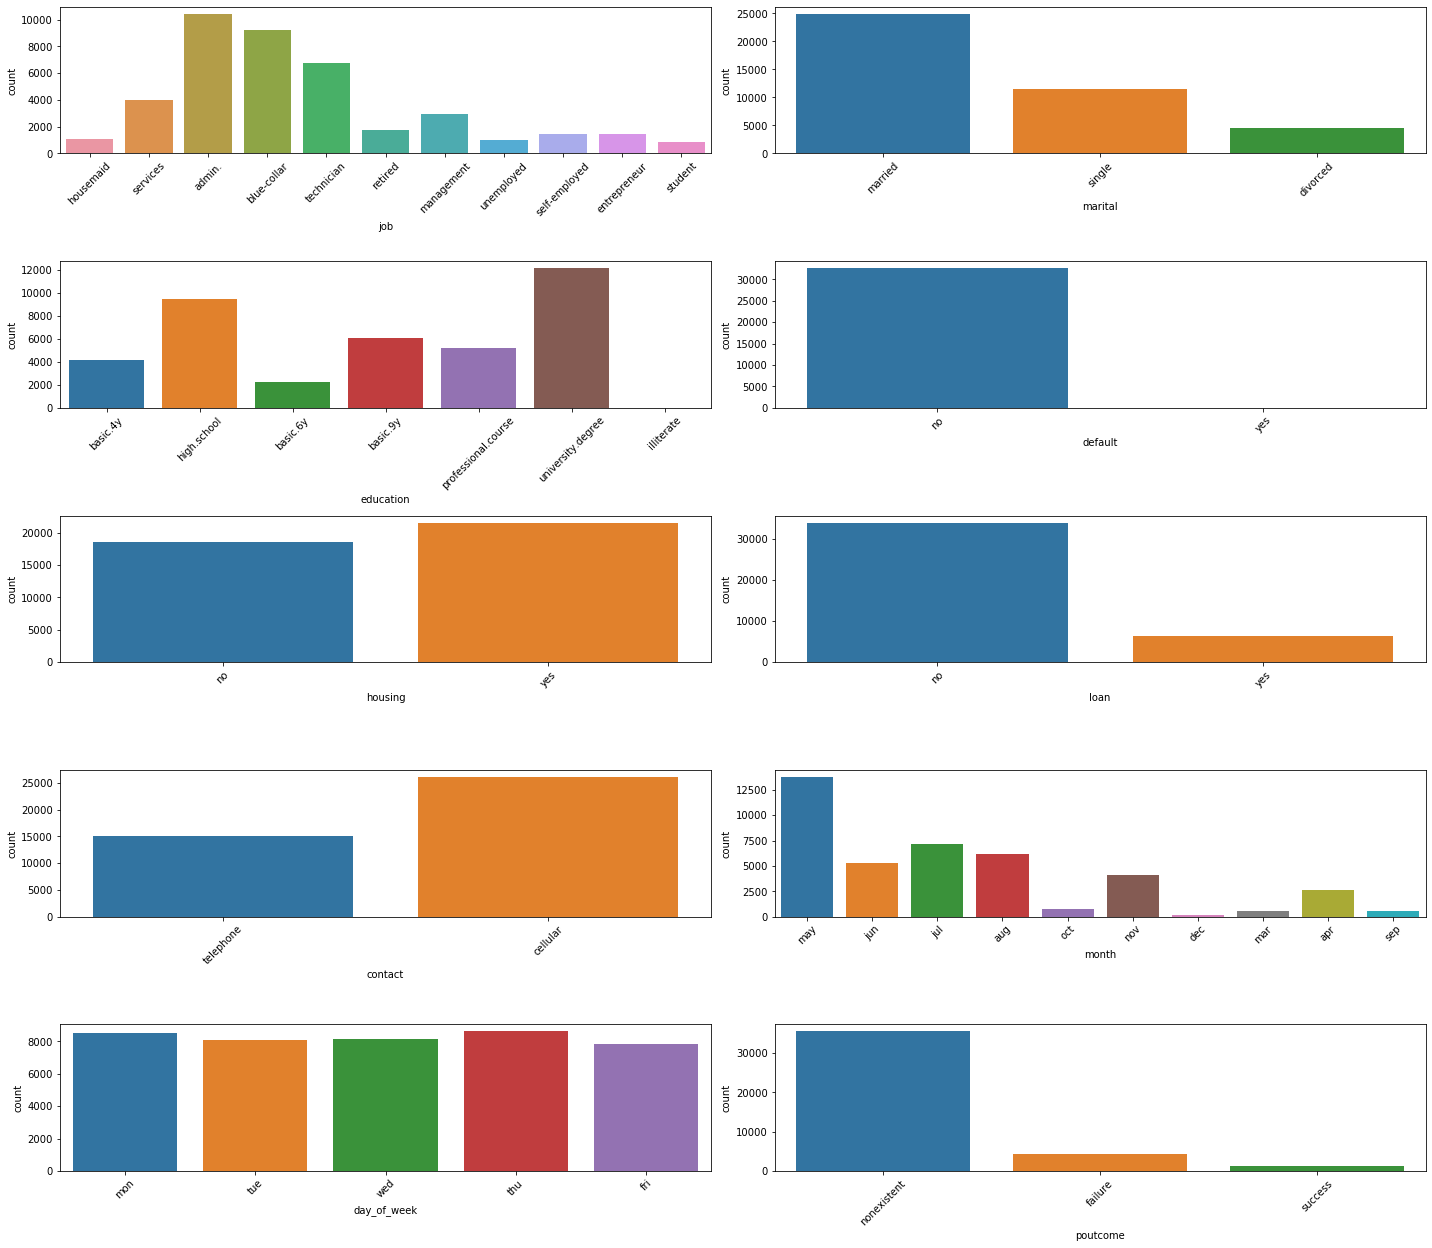

In [10]:
plt.figure(figsize=(20,20))
for i,col in enumerate(categorical_features,start=1):
    plt.subplot(6,2,i);
    sns.countplot(x=df[col], data = df);
    plt.xticks(rotation =45)
#     plt.xlabel()
    plt.tight_layout()
plt.show()

Observations:
1. Most customers are doing blue-collar or admin or technician jobs.
2. More than 50 percent of the customers being contacted are married.
3. Most of the cotacted customers are university graduates.
4. Most of the people customers not defaulted on the previous loans which is quite understandable.
5. Most of the customers were contacted in the month of May. However, no conclusion can be drawn as the year of contact is not given.
6. "poutcome" of most of the customer is nonexistance. This feature might be well-correlated to the feature "previous". It needs further analysis.

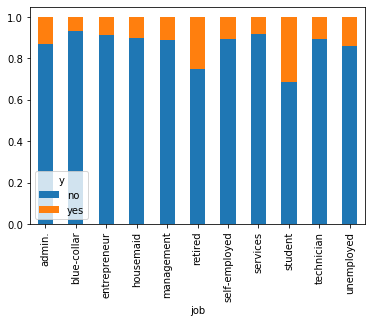

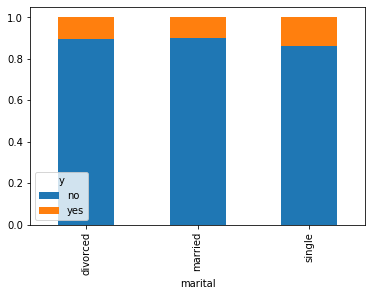

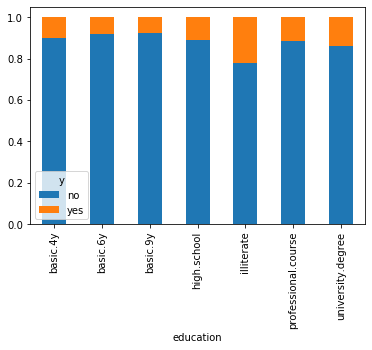

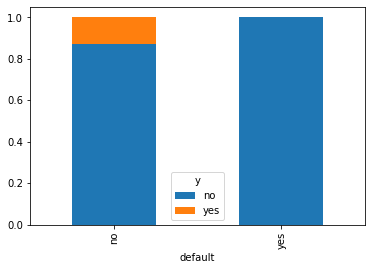

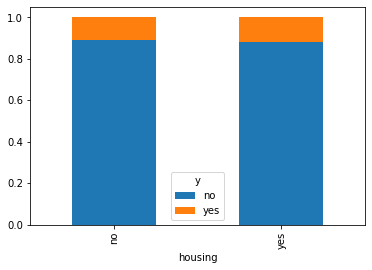

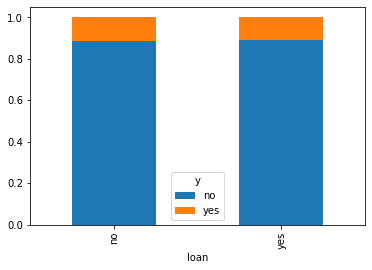

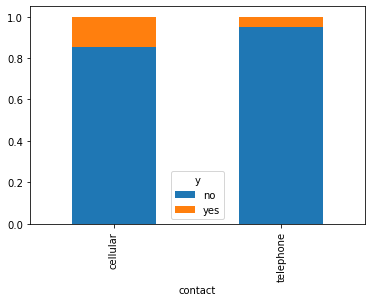

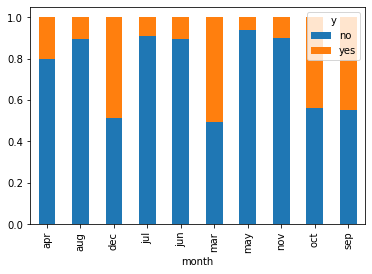

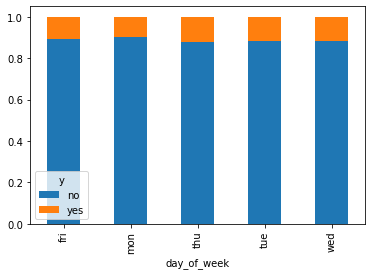

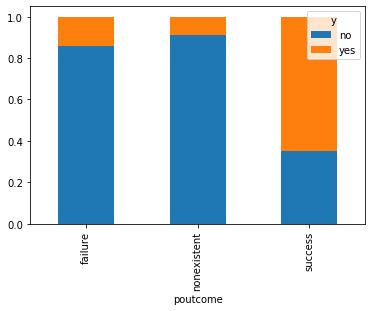

In [11]:
for i,col in enumerate(categorical_features):
    df.groupby(col)['y'].value_counts(normalize = True).unstack(level=1).plot.bar(stacked = True)

Observations: Features which seems to be associated to "y" are "job", "default", "contact", "month", "poutcome"

In [12]:

for i in numerical_features:
    print("The length of unique values of %s is %s." %(i, len(df[i].unique())))
# print(df["nr.employed"].unique())
# print(len(df["nr.employed"].unique()))


The length of unique values of age is 78.
The length of unique values of duration is 1544.
The length of unique values of campaign is 42.
The length of unique values of pdays is 27.
The length of unique values of previous is 8.
The length of unique values of emp.var.rate is 10.
The length of unique values of cons.price.idx is 26.
The length of unique values of cons.conf.idx is 26.
The length of unique values of euribor3m is 316.
The length of unique values of nr.employed is 11.


<Figure size 2160x720 with 0 Axes>

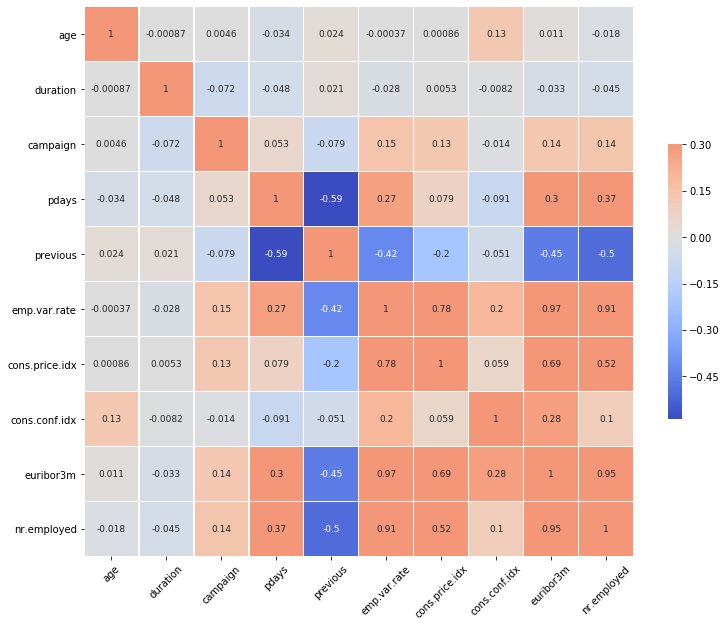

In [13]:
plt.figure(figsize=(30,10))
corr = df[numerical_features].corr()
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, vmax=.3, annot = True, annot_kws={"size": 9}, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, cmap= "coolwarm")
plt.tight_layout()
plt.xticks(rotation = 45)
plt.show()

Findings:
1. Euribo3m is highly correlated to emp.var.rate (0.97).
2. Euribo3m is highly correlated to nr.employed (0.95).
3. emp.var.rate is highly correlated to nr.employed (0.91). This is quite understandable as both are related to employment. 
4. pdays and previous are negatively correlated (-0.59). THe high correlation can be explain by mostly (0 and 999 values of these features).
We will drop "euribor3m" on account of its high correlation to other features.

In [14]:
display(df.head())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [15]:
# df.drop(columns=["euribor3m", "emp.var.rate", "duration"], axis=1, inplace=True)
df.drop(columns=["duration", "emp.var.rate"], axis=1, inplace=True)  
print(df.shape)

(41188, 19)


Because of a high correlation of "emp.var.rate" with other features and it's similarty and high correlation with "nr.employed", I have dropped this variable from analysis.

In [16]:
##A new feature (pdays_new) is created in this step.

display(df.loc[(df["pdays"]==999) & (df["previous"]!=0)])
display(df.loc[(df["pdays"]==999)])
df.loc[:, "pdays_new"] = df["pdays"].apply(lambda x: 0 if x==999 else 1)
display(df.head())
display(df.shape)
display(df.pdays_new.value_counts())

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24013,38,blue-collar,single,NaN,no,yes,no,telephone,oct,tue,1,999,1,failure,93.798,-40.4,4.968,5195.8,no
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,1,999,1,failure,93.798,-40.4,4.968,5195.8,yes
24076,36,admin.,married,university.degree,no,yes,no,telephone,nov,wed,1,999,1,failure,93.200,-42.0,4.663,5195.8,no
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,1,999,1,failure,93.200,-42.0,4.286,5195.8,yes
24113,29,self-employed,married,university.degree,no,yes,no,telephone,nov,thu,1,999,1,failure,93.200,-42.0,4.245,5195.8,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41166,32,admin.,married,university.degree,no,no,no,telephone,nov,wed,1,999,1,failure,94.767,-50.8,1.030,4963.6,yes
41170,40,management,divorced,university.degree,no,yes,no,cellular,nov,wed,2,999,4,failure,94.767,-50.8,1.030,4963.6,no
41173,62,retired,married,university.degree,no,yes,no,cellular,nov,thu,1,999,2,failure,94.767,-50.8,1.031,4963.6,yes
41175,34,student,single,NaN,no,yes,no,cellular,nov,thu,1,999,2,failure,94.767,-50.8,1.031,4963.6,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,94.767,-50.8,1.028,4963.6,yes


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_new
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no,0


(41188, 20)

0    39673
1     1515
Name: pdays_new, dtype: int64

### 3. Missing Values Treatment

In [17]:
##Features with missing values
missing_val = [i for i in df.columns if any(df[i].isnull())==True]
for i in missing_val:
    print("Missing values in %s is %s (%s percent) " %(i,df[i].isnull().sum(), round(((df[i].isnull().sum())/(len(df[i]))*100),2)))



Missing values in job is 330 (0.8 percent) 
Missing values in marital is 80 (0.19 percent) 
Missing values in education is 1731 (4.2 percent) 
Missing values in default is 8597 (20.87 percent) 
Missing values in housing is 990 (2.4 percent) 
Missing values in loan is 990 (2.4 percent) 


In [18]:
display(pd.crosstab(df["job"], df["education"]))
display(pd.crosstab(df["job"], df["marital"]))
display(pd.crosstab(df["job"], df["default"]))
display(pd.crosstab(df["job"], df["housing"]))
display(pd.crosstab(df["job"], df["loan"]))

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree
job,,,,,,,
admin.,77,151,499,3329,1,363,5753
blue-collar,2318,1426,3623,878,8,453,94
entrepreneur,137,71,210,234,2,135,610
housemaid,474,77,94,174,1,59,139
management,100,85,166,298,0,89,2063
retired,597,75,145,276,3,241,285
self-employed,93,25,220,118,3,168,765
services,132,226,388,2682,0,218,173
student,26,13,99,357,0,43,170


marital,divorced,married,single
job,,,
admin.,1280,5253,3875
blue-collar,728,6687,1825
entrepreneur,179,1071,203
housemaid,161,777,119
management,331,2089,501
retired,348,1274,93
self-employed,133,904,379
services,532,2294,1137
student,9,41,824


default,no,yes
job,,
admin.,9129,0
blue-collar,6088,0
entrepreneur,1155,0
housemaid,741,0
management,2466,0
retired,1327,0
self-employed,1139,0
services,3053,0
student,771,0


housing,no,yes
job,,
admin.,4636,5559
blue-collar,4304,4710
entrepreneur,641,779
housemaid,491,540
management,1363,1490
retired,784,892
self-employed,641,740
services,1818,2050
student,381,471


loan,no,yes
job,,
admin.,8485,1710
blue-collar,7648,1366
entrepreneur,1214,206
housemaid,877,154
management,2414,439
retired,1436,240
self-employed,1186,195
services,3267,601
student,710,142


Crosstab analysis of "age" feature with other variables did not show good results except with "education" which is quite intuitive with the assumption that the level/type of education affect the job profile. Also, job (student) is likely to be associated to marital(single). SO, I have used ramdon forestbased algorithm to impute missing values.

In [19]:
##Tried to decode the pattern of missing values.
display(df[((df["housing"].isnull()) & (df["loan"].isnull()))])
display(df[((df["housing"].isnull()) != (df["loan"].isnull()))])
# print(pd.crosstab(df["housing"], df["job"]))
# print(pd.crosstab(df["loan"], df["job"]))
display(df["housing"].unique())
display(df["housing"].value_counts())
#### This is the case of missing at random. As the pattern of missing data is not complately at random.

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_new
29,55,NaN,married,university.degree,NaN,NaN,NaN,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no,0
81,51,blue-collar,married,basic.4y,NaN,NaN,NaN,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no,0
261,27,blue-collar,single,basic.6y,no,NaN,NaN,telephone,may,mon,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no,0
385,59,management,married,basic.4y,NaN,NaN,NaN,telephone,may,tue,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no,0
401,48,services,married,high.school,NaN,NaN,NaN,telephone,may,tue,1,999,0,nonexistent,93.994,-36.4,4.857,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,no,NaN,NaN,cellular,oct,tue,1,3,1,success,94.601,-49.5,1.008,4963.6,yes,1
41014,31,technician,single,professional.course,no,NaN,NaN,cellular,oct,thu,2,999,0,nonexistent,94.601,-49.5,1.025,4963.6,yes,0
41015,34,admin.,divorced,university.degree,no,NaN,NaN,cellular,oct,thu,2,999,1,failure,94.601,-49.5,1.025,4963.6,no,0
41029,46,management,married,university.degree,no,NaN,NaN,cellular,oct,mon,2,12,2,failure,94.601,-49.5,1.032,4963.6,no,1


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_new


array(['no', 'yes', nan], dtype=object)

yes    21576
no     18622
Name: housing, dtype: int64

"housing" and "loan features have missing values together". I tried to run the crosstab analysis to analyze if they are correlated to other features like "job" and "education" But the numbers do not seem to indicate the same.

To avoid complexities at the time being, I have resorted to imputing the missing values using the CategoricalImputer method of sklearn_pandas module. 

Random forest approach can be used to impute missing values. https://www.mikulskibartosz.name/fill-missing-values-using-random-forest/



In [20]:
##Decision tree based algorith to impute missing values in dataset.

from sklearn.tree import DecisionTreeClassifier
    
def convert_cats(df,cols):
"'Converging categorical variables into numerical labels'"
  for i in cols:
    df[i] = df[i].astype("category").cat.codes
  return df

def fillMissing(missing_cols , df):
"'To impute missing values'"
  df1=df.copy()
  for col in missing_cols:
    df1=convert_cats(df1,['job','marital','education','loan','contact','month','poutcome','y',"default" ,"housing","day_of_week"])
    test=df1[df1[col]==-1]
    train=df1[df1[col]!=-1]
    tree=DecisionTreeClassifier()
    tree.fit(train.drop(col,axis=1),train[col])
    test.loc[:,col]=tree.predict(test.drop(col,axis=1))
    df1 = train.append(test)
    df1.replace(-1,np.NaN,inplace=True)
  
  return df1

df1 = fillMissing(["job" , "marital","education","loan","default" ,"housing"],df.copy())
df1.shape

c:\users\monika\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\monika\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
c:\users\monika\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

(41188, 20)

In [21]:
##Outliers Analysis


for i in ["age", "campaign", "pdays", "previous"]:
    Q1 = df[i].quantile(q = 0.25)
    Q2 = df[i].quantile(q = 0.50)
    Q3 = df[i].quantile(q = 0.75)
    IQR = Q3-Q1              ### Interquartile Range
    LIQR = Q1 - 1.5 * IQR    ###Lower IQR cut-off value
    UIQR = Q3 + 1.5 * IQR    ###Upper IQR cut-off value
    print("Lower and upper cutoff values of outliers in %s are %s and %s \n" %(i, LIQR, UIQR))

## Analyzing the outliers of "age"
df.loc[df["age"]<9.5]             ##No value less then 9.5 years of age
df.loc[df["age"]>69.5]           #### The results point that the ages are genuine and are not mistaken. 
                                    ####However, to minimize the impact of these extreme values, I have winsorized these values
                                    ### to the UIQR value.
# df.loc[df["age"]>69.5, "age"] = 69.5
df.loc[df["age"]>69.5]

## Analyzing the outliers of "campaign"
df.loc[df["campaign"]<(-2)]             ##No value less than the LIQR.
df.loc[df["campaign"]>(6.0)]            ### 2406 data points meet this criteria. Does not make sense to leave this much data.
(df.loc[df["campaign"]>(6.0)]["campaign"]).value_counts()       ## Getting an insight into the distribution of values with campaign count more than 3   
# df.loc[df["campaign"]>(6.0), "campaign"]  = 6.0            ## As most of the values are confined to 7/8. I can safely change the outlier value to 6.
df.loc[df["campaign"]>(6.0)]  




## Analyzing the outliers of "pdays" and "previous"
##Data indicates the all the data points are outliers ar the value of LIQR and UIQR are the same. I am leaving them untouched. Will handle these points later, if needed.


Lower and upper cutoff values of outliers in age are 9.5 and 69.5 

Lower and upper cutoff values of outliers in campaign are -2.0 and 6.0 

Lower and upper cutoff values of outliers in pdays are 999.0 and 999.0 

Lower and upper cutoff values of outliers in previous are 0.0 and 0.0 



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_new
887,54,admin.,married,university.degree,no,no,no,telephone,may,wed,7,999,0,nonexistent,93.994,-36.4,4.856,5191.0,no,0
1043,41,technician,single,university.degree,NaN,no,no,telephone,may,wed,8,999,0,nonexistent,93.994,-36.4,4.856,5191.0,no,0
1094,40,technician,married,professional.course,no,yes,no,telephone,may,wed,8,999,0,nonexistent,93.994,-36.4,4.856,5191.0,no,0
1097,51,blue-collar,married,basic.4y,NaN,yes,no,telephone,may,wed,7,999,0,nonexistent,93.994,-36.4,4.856,5191.0,no,0
1230,48,blue-collar,divorced,basic.4y,no,no,no,telephone,may,thu,7,999,0,nonexistent,93.994,-36.4,4.855,5191.0,no,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40611,75,retired,married,basic.9y,no,no,no,telephone,sep,fri,9,999,1,failure,94.199,-37.5,0.883,4963.6,no,0
40631,88,retired,married,basic.4y,no,yes,no,cellular,sep,mon,7,999,0,nonexistent,94.199,-37.5,0.882,4963.6,no,0
40698,29,technician,single,professional.course,no,yes,no,cellular,sep,mon,7,3,5,success,94.199,-37.5,0.879,4963.6,no,1
40821,33,technician,single,professional.course,no,yes,no,cellular,sep,fri,9,999,2,failure,94.199,-37.5,0.879,4963.6,no,0


In [22]:
print(categorical_features)
for col in categorical_features:
   df1[col] = df1[col].astype('category',copy=False)
df1["y"] = df1["y"].astype('category',copy=False)
print(df1.info())
display(df1.head())

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 0 to 21556
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null category
marital           41188 non-null category
education         41188 non-null category
default           41188 non-null category
housing           41188 non-null category
loan              41188 non-null category
contact           41188 non-null category
month             41188 non-null category
day_of_week       41188 non-null category
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null category
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null category


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,pdays_new
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,5191.0,0,0
2,37,7,1,3,0,1,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,5191.0,0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,5191.0,0,0
4,56,7,1,3,0,0,1,1,6,1,1,999,0,1,93.994,-36.4,4.857,5191.0,0,0
6,59,0,1,5,0,0,0,1,6,1,1,999,0,1,93.994,-36.4,4.857,5191.0,0,0


### 4. Data Preprocessing

In [23]:
###Getting dummy variables
# import math
print(df1.shape)
df1 = pd.get_dummies(df1, drop_first=True).reset_index(drop=True)                 ##Getting dummies for the categorical variables


display(df1.head())
print(df1.shape)
print(df1.columns)
df1.rename(columns = {'y_1':'y'}, inplace = True) 
print(df1.columns)


(41188, 20)


,age,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pdays_new,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,marital_1,marital_2,education_1,education_2,education_3,education_4,education_5,education_6,default_1,housing_1,loan_1,contact_1,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_1,poutcome_2,y_1
0,56,1,999,0,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
1,37,1,999,0,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
2,40,1,999,0,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
3,56,1,999,0,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
4,59,1,999,0,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


(41188, 47)
Index(['age', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays_new', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'marital_1', 'marital_2', 'education_1', 'education_2', 'education_3', 'education_4', 'education_5', 'education_6', 'default_1', 'housing_1', 'loan_1', 'contact_1', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'poutcome_1', 'poutcome_2', 'y_1'], dtype='object')
Index(['age', 'campaign', 'pdays', 'previous', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'pdays_new', 'job_1', 'job_2', 'job_3', 'job_4', 'job_5', 'job_6', 'job_7', 'job_8', 'job_9', 'job_10', 'marital_1', 'marital_2', 'education_1', 'education_2', 'education_3', 'education_4', 'education_5', 'education_6', 'default_1', 'housing_1', 'loan_1', 'contact_1', 'month_1', 

In [24]:
X = df1.drop("y", axis = 1)
y=df1["y"]
print(X.shape)
print(y.shape)


(41188, 46)
(41188,)


In [25]:

### One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (28831, 46)
Number transactions y_train dataset:  (28831,)
Number transactions X_test dataset:  (12357, 46)
Number transactions y_test dataset:  (12357,)


Using TensorFlow backend.


In [26]:
print("With normal sampling the count of '1': %s" %(sum(y_train==1)))
print("With normal sampling the count of '0': %s" %(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train.ravel())

print('After SMOTE sampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After SMOTE sampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After SMOTE sampling, counts of label '1': %s" %(sum(y_train_smote==1)))
print("After SMOTE sampling, counts of label '0': %s" %(sum(y_train_smote==0)))



With normal sampling the count of '1': 3248
With normal sampling the count of '0': 25583
After SMOTE sampling, the shape of train_X: (51166, 46)
After SMOTE sampling, the shape of train_y: (51166,) 

After SMOTE sampling, counts of label '1': 25583
After SMOTE sampling, counts of label '0': 25583


### 5. Model Building and Evaluation

c:\users\monika\appdata\local\programs\python\python37\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


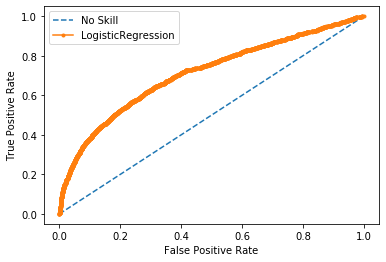

0.7118352346284678
              precision    recall  f1-score   support

           0       0.92      0.89      0.91     10965
           1       0.32      0.40      0.35      1392

    accuracy                           0.84     12357
   macro avg       0.62      0.65      0.63     12357
weighted avg       0.85      0.84      0.84     12357



In [27]:
###Logistic Regression Model

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# param_test1 = {'solver': ['lbfgs', 'liblinear'], 'C': [100, 10, 1.0, 0.1, 0.01], 'penalty': ['none', 'l1', 'l2']}
# lr_grid = GridSearchCV(LogisticRegression(), param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5)
# lr_grid.fit(X_train_smote,y_train_smote)
# print(lr_grid.best_params_)

lr = LogisticRegression(solver= "liblinear", C = 1.0, penalty="l1")    ##Best parameters suggested by GridSearch program
lr.fit(X_train_smote,y_train_smote)




# # predict probabilities
yhat = lr.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='LogisticRegression')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# calculate roc auc
roc_auc = roc_auc_score(y_test, pos_probs)
print(roc_auc)

y_pred = lr.predict(X_test)
print(classification_report(y_test, y_pred))

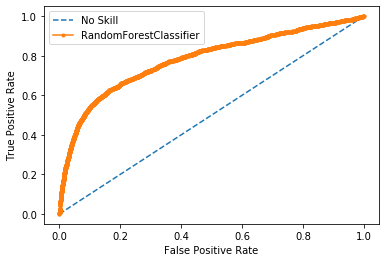

0.7822981692008533
              precision    recall  f1-score   support

           0       0.93      0.92      0.93     10965
           1       0.45      0.48      0.46      1392

    accuracy                           0.87     12357
   macro avg       0.69      0.70      0.70     12357
weighted avg       0.88      0.87      0.88     12357



In [28]:
### Random forest Classifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# param_test1 = {'n_estimators': [10, 100, 1000], 'max_features': ['sqrt', 'log2'], "max_depth": [5,10, 15]}

# rf_grid = GridSearchCV(estimator = RandomForestClassifier(), 
#  param_grid = param_test1, scoring='roc_auc',n_jobs=-1,iid=False, cv=5)
# rf_grid.fit(X_train_smote,y_train_smote)

# print(rf_grid.best_params_)


rf = RandomForestClassifier(max_depth=15, max_features="sqrt", n_estimators=1000)    ##Best parameters suggested by GridSearch program
rf.fit(X_train_smote,y_train_smote)


# predict probabilities
yhat = rf.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='RandomForestClassifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# calculate roc auc
roc_auc = roc_auc_score(y_test, pos_probs)
print(roc_auc)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

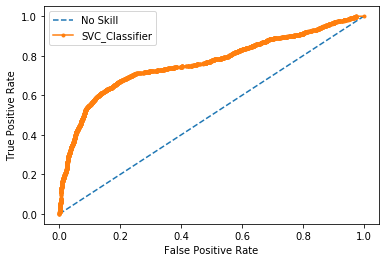

0.7651054360530632
              precision    recall  f1-score   support

           0       0.95      0.72      0.82     10965
           1       0.25      0.72      0.37      1392

    accuracy                           0.72     12357
   macro avg       0.60      0.72      0.59     12357
weighted avg       0.87      0.72      0.77     12357



In [30]:
### SVC Classifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC


# param_test1 = {'kernel': ['linear', 'rbf', 'poly'], 'gamma' : [0.1, 1, 10, 100], 'C' : [0.1, 1, 10, 100, 1000]}

# svc_grid = GridSearchCV(estimator = SVC(), 
#  param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5)
# svc_grid.fit(X_train_smote,y_train_smote)

# print(rf_grid.best_params_)


svc = SVC(probability=True)
svc.fit(X_train_smote,y_train_smote)


# predict probabilities
yhat = svc.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='SVC_Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# calculate roc auc
roc_auc = roc_auc_score(y_test, pos_probs)
print(roc_auc)

y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

# 

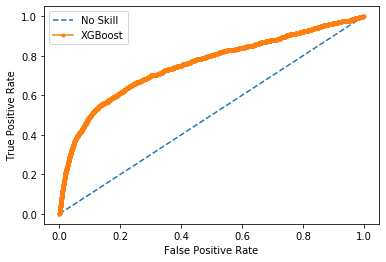

0.75539893784298
              precision    recall  f1-score   support

           0       0.93      0.89      0.91     10965
           1       0.37      0.51      0.43      1392

    accuracy                           0.85     12357
   macro avg       0.65      0.70      0.67     12357
weighted avg       0.87      0.85      0.86     12357



In [32]:
# XGBoost Classifier: example of a roc curve for a predictive model
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot


# param_test1 = {'max_depth':[5,10,15], 'n_estimators': [100, 1000, 10000], 'min_child_weight' : [ 1, 3, 5, 7 ], 'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ] } 
# xg_grid = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, objective= 'binary:logistic'), 
#  param_grid = param_test1, scoring='roc_auc',n_jobs=-1, cv=5)
# xg_grid.fit(X_train_smote,y_train_smote)


# print(xg_grid.best_params_)


xg = XGBClassifier(n_estimators = 150, max_depth = 2, learning_rate = 0.1)
xg.fit(X_train_smote,y_train_smote)


# predict probabilities
yhat = xg.predict_proba(X_test)
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(y_test, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='XGBoost')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# calculate roc auc
roc_auc = roc_auc_score(y_test, pos_probs)
print(roc_auc)

y_pred = xg.predict(X_test)
print(classification_report(y_test, y_pred))

The combined analysis of AUC-ROC, precision and recall values shows the Random Forest model to be a better model for decision making with a balanced value of precision (45 percent) and recall (48 percent) score parameters. 

In [39]:
### get importance
importance = rf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature name: %s, Score: %.5f' % ((X_train_smote.columns[i]),v))

Feature name: age, Score: 0.05096
Feature name: campaign, Score: 0.02951
Feature name: pdays, Score: 0.02506
Feature name: previous, Score: 0.02013
Feature name: cons.price.idx, Score: 0.04793
Feature name: cons.conf.idx, Score: 0.05817
Feature name: euribor3m, Score: 0.15149
Feature name: nr.employed, Score: 0.11344
Feature name: pdays_new, Score: 0.02766
Feature name: job_1, Score: 0.02548
Feature name: job_2, Score: 0.00546
Feature name: job_3, Score: 0.00439
Feature name: job_4, Score: 0.00995
Feature name: job_5, Score: 0.00378
Feature name: job_6, Score: 0.00514
Feature name: job_7, Score: 0.01198
Feature name: job_8, Score: 0.00230
Feature name: job_9, Score: 0.01365
Feature name: job_10, Score: 0.00295
Feature name: marital_1, Score: 0.01696
Feature name: marital_2, Score: 0.01390
Feature name: education_1, Score: 0.00685
Feature name: education_2, Score: 0.01702
Feature name: education_3, Score: 0.02561
Feature name: education_4, Score: 0.00004
Feature name: education_5, Score